<a href="https://colab.research.google.com/github/SyedMuhammadMuhsinKarim/Deep-Learning-with-Python/blob/master/imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install tensorflow --upgrade

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

In [0]:
word_index = imdb.get_word_index()

In [0]:
print(word_index)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
reverse_word_index

In [0]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [0]:
decoded_review

# Preparing Test Data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))     # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_test[0], "\n", x_train[0])

[0. 1. 1. ... 0. 0. 0.] 
 [0. 1. 1. ... 0. 0. 0.]


In [0]:
y_train = np.asarray(train_label).astype('float')
y_test = np.asarray(test_label).astype('float')
print(y_test, y_train)

[0. 1. 1. ... 0. 0. 0.] [1. 0. 0. ... 0. 1. 0.]


In [0]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(12, kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape = (10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
x_val = x_train[:10000] # (10000, 10000)
partial_x_train = x_train[10000:] # (15000, 10000)
y_val = y_train[:10000] # (10000,) 
partial_y_train = y_train[10000:]  # (15000,)

print(x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape)

(10000, 10000) (15000, 10000) (10000,) (15000,)


In [0]:
model.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy', 
    metrics=["accuracy"]
)

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=500, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.6778 - accuracy: 0.6023 - val_loss: 0.5827 - val_accuracy: 0.8136
Epoch 2/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.5781 - accuracy: 0.7273 - val_loss: 0.4802 - val_accuracy: 0.8666
Epoch 3/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.5043 - accuracy: 0.7873 - val_loss: 0.4196 - val_accuracy: 0.8742
Epoch 4/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.4494 - accuracy: 0.8254 - val_loss: 0.3692 - val_accuracy: 0.8816
Epoch 5/20
15000/15000 [==============================] - 2s 105us/sample - loss: 0.4074 - accuracy: 0.8518 - val_loss: 0.3442 - val_accuracy: 0.8844
Epoch 6/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.3788 - accuracy: 0.8718 - val_loss: 0.3350 - val_accuracy: 0.8820
Epoch 7/20
15000/15000 [==========================

In [0]:
history_dict = history.history
print(history_dict)

{'loss': [0.6830476303895314, 0.6453174173831939, 0.6206962108612061, 0.5974998593330383, 0.5846814195315043, 0.5725487510363261, 0.5625012159347534, 0.5510851124922435, 0.5441118121147156, 0.5374017179012298, 0.5287476678689321, 0.5243554184834163, 0.5213067183891932, 0.5101700494686763, 0.5026979794104894, 0.4975617329279582, 0.49682471056779226, 0.4877864976723989, 0.48078134457270305, 0.48362625936667125], 'accuracy': [0.5413333, 0.56553334, 0.5984, 0.6292667, 0.6442, 0.6709333, 0.6918, 0.7033333, 0.70933336, 0.7216, 0.724, 0.733, 0.7367333, 0.74666667, 0.75086665, 0.7574667, 0.7566, 0.7614667, 0.7729333, 0.7664667], 'val_loss': [0.6492361068725586, 0.5910679548978806, 0.558003842830658, 0.5330578982830048, 0.5065250754356384, 0.4939986318349838, 0.4712801933288574, 0.44654163271188735, 0.4424300596117973, 0.430890266597271, 0.4224883869290352, 0.40790132284164426, 0.3998320311307907, 0.3901719316840172, 0.37859764248132705, 0.38223020285367965, 0.3764791190624237, 0.37448529303073

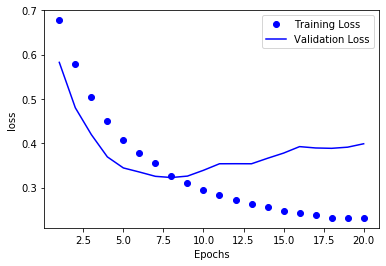

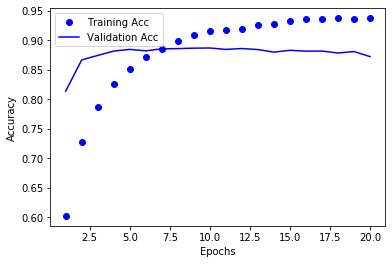

<Figure size 432x288 with 0 Axes>

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label="Training Acc")
plt.plot(epochs, val_acc_values, 'b', label="Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

In [0]:
loss_values = history_dict['loss']
loss_values = np.asarray(loss_values).astype('float').mean() * 100
val_loss_values = history_dict['val_loss']
val_loss_values = np.asarray(val_loss_values).astype('float').mean()* 100
acc_values = history_dict['accuracy']
acc_values = np.asarray(acc_values).astype('float').mean()* 100
val_acc_values = history_dict['val_accuracy']
val_acc_values = np.asarray(val_acc_values).astype('float').mean()* 100
print(loss_values, val_loss_values,"\n", acc_values, val_acc_values)

33.89363430688779 38.04054692387581 
 87.90033340454102 87.79100060462952


In [0]:
pred = model.predict(x_test).flatten()

In [0]:
import pandas as pd
diff =  y_test - (pred)
loss = pd.Series(np.abs(diff)).mean() * 100
print("accuracy:", 100 - loss)

accuracy: 83.89923501009359
